In [2]:
import pandas as pd
import numpy as np

In [3]:
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib


In [4]:
data, meta = arff.loadarff("Training Dataset.arff")
df = pd.DataFrame(data)

In [5]:
df = df.applymap(lambda x: int(x.decode("utf-8")) if isinstance(x, bytes) else x)

C:\Users\Unnimaya\AppData\Local\Temp\ipykernel_6584\522194210.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x.decode("utf-8")) if isinstance(x, bytes) else x)


In [6]:
df.to_csv("phishing_dataset.csv", index=False)

In [7]:
df

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [8]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [10]:
df.duplicated().sum()

np.int64(5206)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col}: {unique_vals}")

having_IP_Address: [-1  1]
URL_Length: [ 1  0 -1]
Shortining_Service: [ 1 -1]
having_At_Symbol: [ 1 -1]
double_slash_redirecting: [-1  1]
Prefix_Suffix: [-1  1]
having_Sub_Domain: [-1  0  1]
SSLfinal_State: [-1  1  0]
Domain_registeration_length: [-1  1]
Favicon: [ 1 -1]
port: [ 1 -1]
HTTPS_token: [-1  1]
Request_URL: [ 1 -1]
URL_of_Anchor: [-1  0  1]
Links_in_tags: [ 1 -1  0]
SFH: [-1  1  0]
Submitting_to_email: [-1  1]
Abnormal_URL: [-1  1]
Redirect: [0 1]
on_mouseover: [ 1 -1]
RightClick: [ 1 -1]
popUpWidnow: [ 1 -1]
Iframe: [ 1 -1]
age_of_domain: [-1  1]
DNSRecord: [-1  1]
web_traffic: [-1  0  1]
Page_Rank: [-1  1]
Google_Index: [ 1 -1]
Links_pointing_to_page: [ 1  0 -1]
Statistical_report: [-1  1]
Result: [-1  1]


In [13]:
print(df["Result"].value_counts())


Result
-1    3019
 1    2830
Name: count, dtype: int64


In [14]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(df['Result'].value_counts())

Result
-1    3019
 1    2830
Name: count, dtype: int64


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error, mean_squared_error,root_mean_squared_error,r2_score,roc_curve,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

 
KNeighborsClassifier()
accuracy_score: 0.9153846153846154
              precision    recall  f1-score   support

          -1       0.92      0.93      0.92       620
           1       0.92      0.90      0.91       550

    accuracy                           0.92      1170
   macro avg       0.92      0.91      0.92      1170
weighted avg       0.92      0.92      0.92      1170



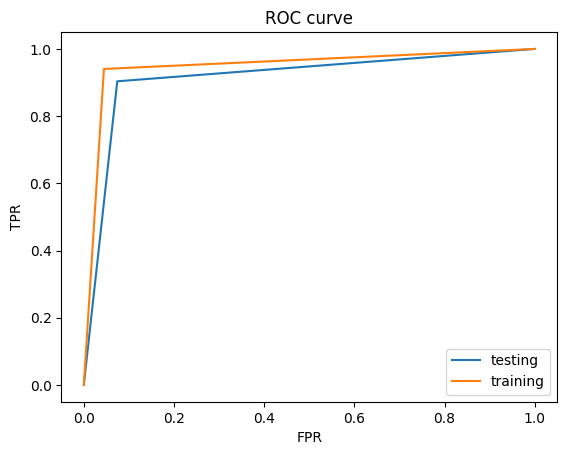

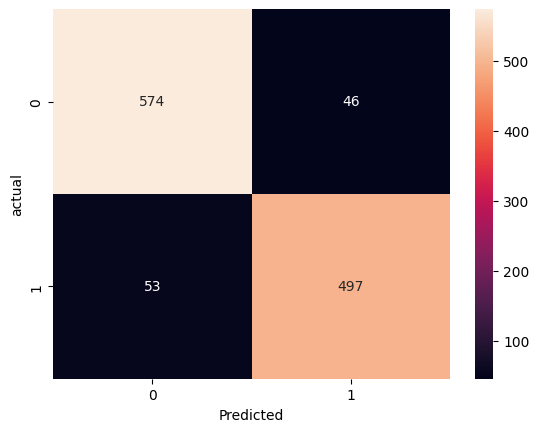

-----------------------
 
SVC()
accuracy_score: 0.9427350427350427
              precision    recall  f1-score   support

          -1       0.96      0.93      0.95       620
           1       0.93      0.95      0.94       550

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170



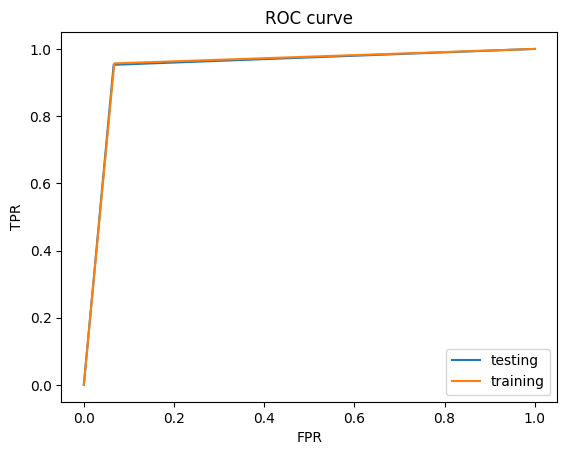

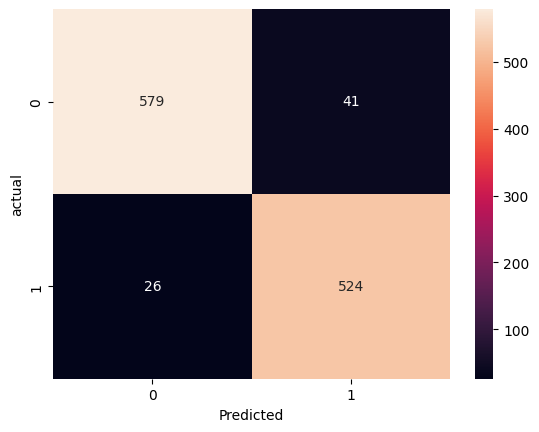

-----------------------
 
GaussianNB()
accuracy_score: 0.6666666666666666
              precision    recall  f1-score   support

          -1       0.61      1.00      0.76       620
           1       0.99      0.29      0.45       550

    accuracy                           0.67      1170
   macro avg       0.80      0.65      0.61      1170
weighted avg       0.79      0.67      0.62      1170



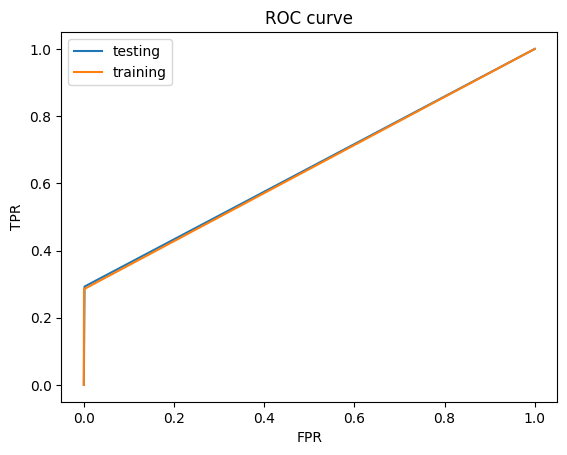

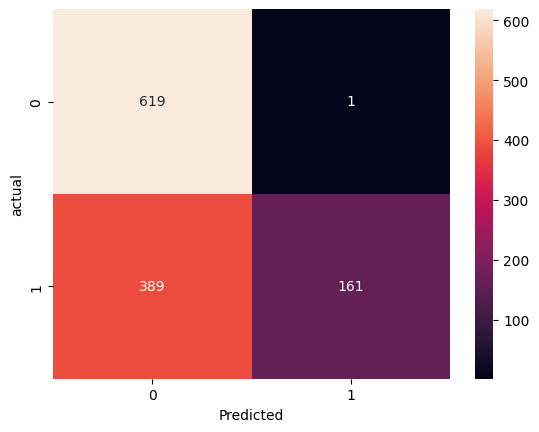

-----------------------
 
DecisionTreeClassifier()
accuracy_score: 0.9273504273504274
              precision    recall  f1-score   support

          -1       0.93      0.94      0.93       620
           1       0.93      0.92      0.92       550

    accuracy                           0.93      1170
   macro avg       0.93      0.93      0.93      1170
weighted avg       0.93      0.93      0.93      1170



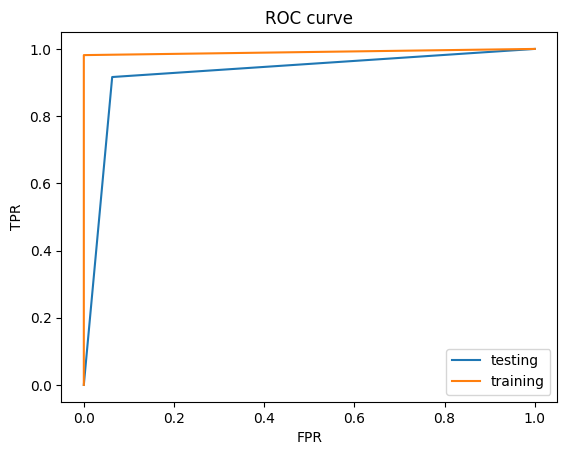

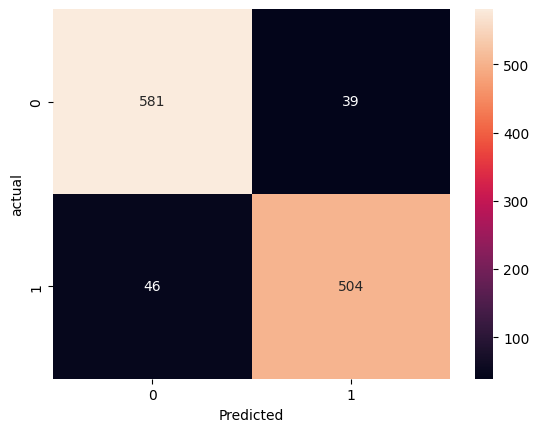

-----------------------
 
RandomForestClassifier()
accuracy_score: 0.9495726495726495
              precision    recall  f1-score   support

          -1       0.96      0.95      0.95       620
           1       0.94      0.95      0.95       550

    accuracy                           0.95      1170
   macro avg       0.95      0.95      0.95      1170
weighted avg       0.95      0.95      0.95      1170



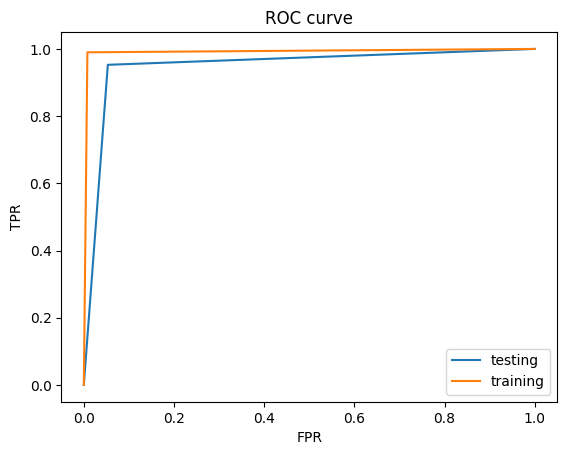

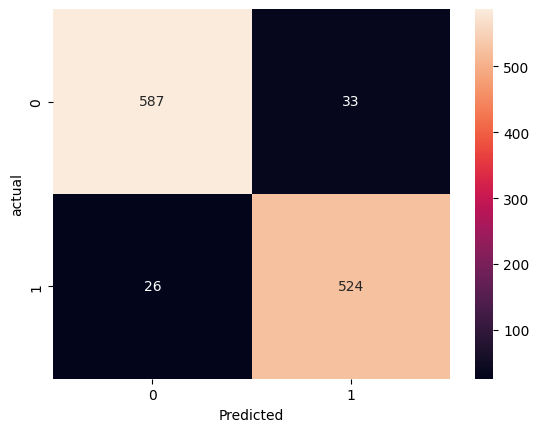

-----------------------
 
GradientBoostingClassifier()
accuracy_score: 0.9444444444444444
              precision    recall  f1-score   support

          -1       0.95      0.94      0.95       620
           1       0.93      0.95      0.94       550

    accuracy                           0.94      1170
   macro avg       0.94      0.94      0.94      1170
weighted avg       0.94      0.94      0.94      1170



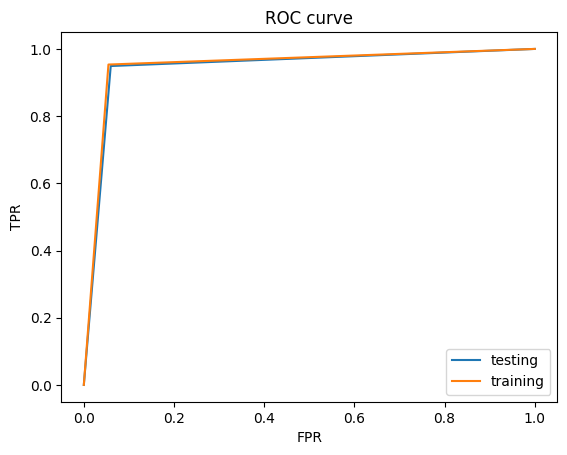

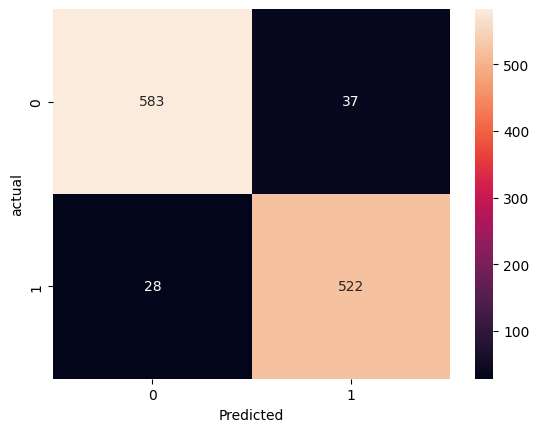

-----------------------


In [19]:
models=[KNeighborsClassifier(),SVC(),GaussianNB(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_pred_train=model.predict(X_train)
    print(' ')
    print(model)
    print('accuracy_score:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    fpr,tpr,threshold=roc_curve(y_test,y_pred)
    fpr_t,tpr_t,threshold_t=roc_curve(y_train,y_pred_train)
    plt.Figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="testing")
    plt.plot(fpr_t,tpr_t,label="training")
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('actual')
    plt.show()
    print('-----------------------')

In [20]:
from sklearn.model_selection import cross_val_score
print('cross_val_score=',cross_val_score(RandomForestClassifier(),X,y,cv=5).mean())

cross_val_score= 0.9444346471891383


In [21]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {
    'n_estimators': [100, 200, 300],        
    'max_depth': [None, 5, 10, 20],       
    'min_samples_split': [2, 5, 10],       
        
}

In [24]:
grid = GridSearchCV(RandomForestClassifier(), parameters, cv=3)
grid.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [25]:
grid.best_estimator_

RandomForestClassifier(min_samples_split=5)

In [26]:
grid.best_score_

np.float64(0.9287040910745374)

In [27]:
from urllib.parse import urlparse
import re

In [28]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [29]:
import whois
import datetime
import requests
from bs4 import BeautifulSoup

In [30]:
# def extract_features(url):
#      features = {}
#      features["having_IP_Address"] = 1 if not re.search(r'\d+\.\d+\.\d+\.\d+', url) else -1
#      features["URL_Length"] = 1 if len(url) < 54 else (0 if len(url) <= 75 else -1)
#      features["Shortining_Service"] = 1 if not re.search(r'bit\.ly|tinyurl|goo\.gl|ow\.ly', url) else -1
#      features["having_At_Symbol"] = 1 if "@" not in url else -1
#      features["double_slash_redirecting"] = 1 if "//" not in urlparse(url).path else -1
#      features["Prefix_Suffix"] = 1 if "-" not in urlparse(url).netloc else -1
#      subdomain_count = urlparse(url).netloc.count('.')
#      features["having_Sub_Domain"] = 1 if subdomain_count <= 1 else (0 if subdomain_count == 2 else -1)
#      features["SSLfinal_State"] = 1 if url.startswith("https") else (0 if url.startswith("http://") else -1)
#      try:
#         domain_info = whois.whois(urlparse(url).netloc)
#         if hasattr(domain_info, 'expiration_date') and domain_info.expiration_date:
#             if isinstance(domain_info.expiration_date, list):
#                 exp_date = domain_info.expiration_date[0]
#             else:
#                 exp_date = domain_info.expiration_date
#             reg_length = (exp_date - datetime.datetime.now()).days
#             features["Domain_registeration_length"] = 1 if reg_length > 365 else -1
#         else:
#             features["Domain_registeration_length"] = -1
#      except:
#         features["Domain_registeration_length"] = -1
#      try:
#         r = requests.get(url, timeout=5)
#         soup = BeautifulSoup(r.text, "html.parser")
#      except:
#         soup = None

#      try:
#         favicon = soup.find("link", rel="shortcut icon") if soup else None
#         if favicon and urlparse(favicon.get("href")).netloc == urlparse(url).netloc:
#             features["Favicon"] = 1
#         else:
#             features["Favicon"] = -1
#      except:
#         features["Favicon"] = -1

#      port = urlparse(url).port
#      features["port"] = 1 if port is None or port in [80, 443] else -1  
#      domain = urlparse(url).netloc
#      features["HTTPS_token"] = 0 if "https" in domain.lower() else -1
#      try:
#         r = requests.get(url, timeout=5)
#         soup = BeautifulSoup(r.text, "html.parser")
#         external_count = 0
#         total_count = 0
#         if soup:
#             for tag in soup.find_all(["img", "script"]):
#                 src = tag.get("src")
#                 if src:
#                     total_count += 1
#                     if urlparse(src).netloc != urlparse(url).netloc:
#                         external_count += 1
#         if total_count == 0 or (external_count / total_count) < 0.5:
#             features["Request_URL"] = 1
#         else:
#             features["Request_URL"] = -1
#      except:
#         features["Request_URL"] = -1

#      try:
#         external_count = 0
#         total_count = 0
#         if soup:
#             for tag in soup.find_all("a"):
#                 href = tag.get("href")
#                 if href:
#                     total_count += 1
#                     if urlparse(href).netloc != urlparse(url).netloc:
#                         external_count += 1
#         features["URL_of_Anchor"] = 1 if total_count==0 or (external_count/total_count)<0.5 else 0
#      except:
#         features["URL_of_Anchor"] = -1
#      try:
#         external_count = 0
#         total_count = 0
#         if soup:
#             for tag in soup.find_all(["link", "script"]):
#                 href = tag.get("href") or tag.get("src")
#                 if href:
#                     total_count += 1
#                     if urlparse(href).netloc != urlparse(url).netloc:
#                         external_count += 1
#         features["Links_in_tags"] = 1 if total_count==0 or (external_count/total_count)<0.5 else 0
#      except:
#         features["Links_in_tags"] = -1
#      try:
#         features["SFH"] = 1
#         if soup:
#             for form in soup.find_all("form"):
#                 action = form.get("action")
#                 if action:
#                     if urlparse(action).netloc != urlparse(url).netloc:
#                         features["SFH"] = 0
#      except:
#         features["SFH"] = -1
     
#      try:
#         features["Submitting_to_email"] = 1  
#         if soup:
#          for form in soup.find_all("form"):
#             action = form.get("action")
#             if action and "mailto:" in action:
#                 features["Submitting_to_email"] = -1  
#      except:
#       features["Submitting_to_email"] = -1  

     
#      try:
#        features["Abnormal_URL"] = 1
#        domain = urlparse(url).netloc
#        if len(domain.split('.')) > 3:  # Too many subdomains
#         features["Abnormal_URL"] = -1
#        if any(c in url for c in ['@', '%', '//', '~']):  # suspicious characters
#         features["Abnormal_URL"] = -1
#      except:
#       features["Abnormal_URL"] = -1

#      path = urlparse(url).path
#      features["Redirect"] = 0 if path.count("//") > 0 else 1
#      try:
#       features["on_mouseover"] = 1  # safe by default
#       if soup and soup.find_all(onmouseover=True):
#         features["on_mouseover"] = -1  # suspicious
#      except:
#       features["on_mouseover"] = -1 
#      try:
#       features["RightClick"] = 1  # safe by default
#       if soup and "contextmenu" in str(soup):
#         features["RightClick"] = -1  # suspicious
#      except:
#       features["RightClick"] = -1
#      try:
#         features["popUpWidnow"] = 1 
#         if soup and ("alert(" in str(soup) or "confirm(" in str(soup)):
#          features["popUpWidnow"] = -1
#      except:
#         features["popUpWidnow"] = -1
#      try:
#         features["Iframe"] = 1
#         if soup and soup.find_all("iframe"):
#           features["Iframe"] = -1 
#      except:
#         features["Iframe"] = -1
#      try:
#         domain_info = whois.whois(urlparse(url).netloc)
#         if hasattr(domain_info, 'creation_date') and domain_info.creation_date:
#             if isinstance(domain_info.creation_date, list):
#                 age_days = (datetime.datetime.now() - domain_info.creation_date[0]).days
#             else:
#                 age_days = (datetime.datetime.now() - domain_info.creation_date).days
#             features["age_of_domain"] = 1 if age_days>180 else -1
#         else:
#             features["age_of_domain"] = -1
#      except:
#         features["age_of_domain"] = -1
#      try:
#         features["DNSRecord"] = 1 if domain_info else -1
#      except:
#         features["DNSRecord"] = -1
#      features["web_traffic"] = -1
#      features["Page_Rank"] = -1
#      features["Google_Index"] = -1
#      features["Links_pointing_to_page"] = -1
#      features["Statistical_report"] = -1
#      return pd.DataFrame([features])




In [31]:
def extract_features(url):
    features = {}

    # 1. Having IP Address
    has_ip = bool(re.search(r'\d+\.\d+\.\d+\.\d+', url))
    features["having_IP_Address"] = -1 if has_ip else 1

    # 2. Having @ Symbol
    features["having_At_Symbol"] = -1 if "@" in url else 1

    # 🚨 Combined Rule: IP + @ → always phishy
    if has_ip and "@" in url:
        features["Abnormal_URL"] = -1
    else:
        features["Abnormal_URL"] = 1

    # 3. URL Length
    features["URL_Length"] = 1 if len(url) < 54 else -1

    # 4. Shortening Service
    features["Shortining_Service"] = -1 if re.search(r'bit\.ly|tinyurl|goo\.gl|ow\.ly', url) else 1

    # 5. Double Slash Redirection
    path = urlparse(url).path
    features["double_slash_redirecting"] = -1 if "//" in path else 1

    # 6. Prefix-Suffix
    features["Prefix_Suffix"] = -1 if "-" in urlparse(url).netloc else 1

    # 7. Subdomain Count
    subdomain_count = urlparse(url).netloc.count('.')
    features["having_Sub_Domain"] = -1 if subdomain_count > 2 else 1

    # 8. SSL Final State (only check scheme, not cert validation here)
    features["SSLfinal_State"] = 1 if url.startswith("https") else -1

    # 9. Right click, mouseover, iframe, popup (default safe=1, suspicious=-1)
    try:
        r = requests.get(url, timeout=5)
        soup = BeautifulSoup(r.text, "html.parser")
    except:
        soup = None

    try:
        features["on_mouseover"] = -1 if soup and soup.find_all(onmouseover=True) else 1
    except:
        features["on_mouseover"] = -1

    try:
        features["RightClick"] = -1 if soup and "contextmenu" in str(soup) else 1
    except:
        features["RightClick"] = -1

    try:
        features["popUpWidnow"] = -1 if soup and ("alert(" in str(soup) or "confirm(" in str(soup)) else 1
    except:
        features["popUpWidnow"] = -1

    try:
        features["Iframe"] = -1 if soup and soup.find_all("iframe") else 1
    except:
        features["Iframe"] = -1

    # 10. Age of Domain (whois)
    try:
        domain_info = whois.whois(urlparse(url).netloc)
        if hasattr(domain_info, 'creation_date') and domain_info.creation_date:
            if isinstance(domain_info.creation_date, list):
                age_days = (datetime.datetime.now() - domain_info.creation_date[0]).days
            else:
                age_days = (datetime.datetime.now() - domain_info.creation_date).days
            features["age_of_domain"] = 1 if age_days > 180 else -1
        else:
            features["age_of_domain"] = -1
    except:
        features["age_of_domain"] = -1

    # 11. DNS Record
    try:
        features["DNSRecord"] = 1 if domain_info else -1
    except:
        features["DNSRecord"] = -1

    # Force unresolved features to phishy by default
    features["web_traffic"] = -1
    features["Page_Rank"] = -1
    features["Google_Index"] = -1
    features["Links_pointing_to_page"] = -1
    features["Statistical_report"] = -1

    return pd.DataFrame([features])


In [32]:
url = "http://192.168.1.100/login@secure-bank.com"
df_features = extract_features(url)
print(df_features)

   having_IP_Address  having_At_Symbol  Abnormal_URL  URL_Length  \
0                 -1                -1            -1           1   

   Shortining_Service  double_slash_redirecting  Prefix_Suffix  \
0                   1                         1              1   

   having_Sub_Domain  SSLfinal_State  on_mouseover  RightClick  popUpWidnow  \
0                 -1              -1             1           1            1   

   Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  Google_Index  \
0       1             -1          1           -1         -1            -1   

   Links_pointing_to_page  Statistical_report  
0                      -1                  -1  


In [33]:
# Suppose these are the exact columns used while training
expected_features = model.feature_names_in_   # works in sklearn >=1.0

# Extract features from the URL
df_features = extract_features(url)

# Reindex to match training features (fill missing with -1, treat as phishy)
df_features = df_features.reindex(columns=expected_features, fill_value=-1)

# Now prediction will work without error
prediction = model.predict(df_features)
probability = model.predict_proba(df_features)

print("Prediction:", "Legitimate" if prediction[0] == 1 else "Phishy")
print("Prediction Probability:", probability)



Prediction: Phishy
Prediction Probability: [[0.58 0.42]]


In [34]:
import joblib
joblib.dump(model, "phishing_model.pkl")

['phishing_model.pkl']